In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas
import millefeuille as mf

In [2]:
points = mf.PointData()
points['x'] = np.random.rand(400) * 20 - 10
points['y'] = np.random.rand(400) * 20 - 10
points['a'] = points['x']**2 + points['y']**2
points['b'] = points['x']**3 + points['y']**3

In [3]:
grid = mf.Grid()
grid['x'].edges = np.linspace(-10,10,1000)
grid['y'].edges = np.linspace(-10,10,1000)
griddata = mf.GridData(grid)

In [11]:
bins = mf.Grid()
bins['x'].edges = np.linspace(-10, 10, 21)
bins['y'].edges = np.linspace(-10, 10, 21)
hists = mf.GridData(bins)

In [5]:
#hists_x = mf.BinLayer(mf.Grid(bins['x']))

In [16]:
#griddata['a'] = points.interpolate('a', method='nearest')
#griddata['a'] = np.nan_to_num(griddata['a'])
hists['a'] = points.histogram('a', method='mean')
hists['b'] = points.interpolate('a', method='nearest')

In [21]:
#data.translate(source='points', dest='grid', var='a', method='nearest')

In [22]:
#data.translate(source='points', dest='hist', var='a', method='mean')
#data.translate(source='points', dest='hist_x', var='a', method='sum')
#data['hist_x']['b'] = np.sqrt(data['hist_x']['a'])

In [23]:
#data['hist_x']['b']

In [24]:
#data['grid']['a'] = np.nan_to_num(data['grid']['a'])

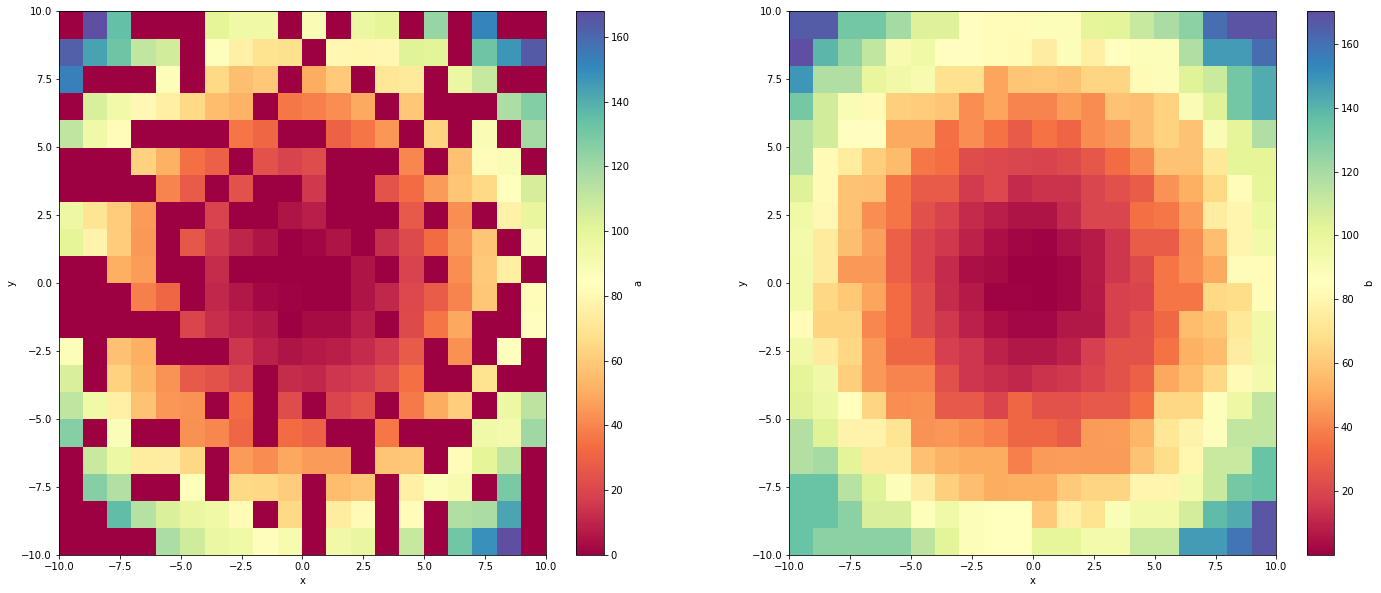

In [21]:
%matplotlib inline
from matplotlib import pyplot as plt

fig, (ax1, ax2) = plt.subplots(figsize=(24,10), ncols=2)
hists.plot_map(fig, ax1, 'a', cmap='Spectral', cbar=True)
hists.plot_map(fig, ax2, 'b', cmap='Spectral', cbar=True)
#data['grid'].plot_contour(fig, ax1, 'a', colors='k', linewidths=0.1)
#data['hist'].plot_map(fig, ax2, 'a', cmap='Spectral')
#data['points'].plot_2d(fig, ax1, 'x', 'y', color='k', s=2, marker='.')


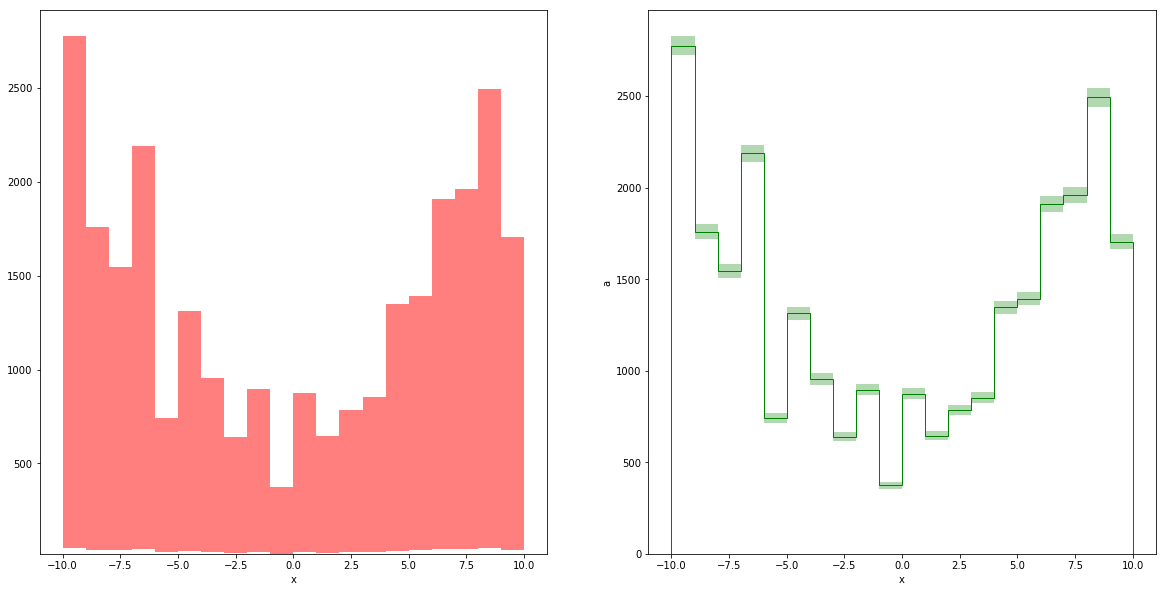

In [172]:
fig, (ax1, ax2) = plt.subplots(figsize=(20,10), ncols=2)
#data['hist_x'].plot_step(fig, ax1, 'a', histtype='stepfilled')
data['hist_x'].plot_band(fig, ax1, 'b', 'a', color='r', alpha=0.5)
data['hist_x'].plot_step(fig, ax2, 'a', histtype='step', color='g')
data['hist_x'].plot_errorband(fig, ax2, 'a', ('b','b'), color='g', alpha=0.3)
#ax2.set_xscale('log')